In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('VCB Historical Data.csv')
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %,Volume
0,2/23/2024,"89,600","89,500","91,400","88,900",1.80M,0.11%,1800000
1,2/22/2024,"89,500","90,600","91,000","89,500",1.22M,-1.86%,1220000
2,2/21/2024,"91,200","91,700","91,700","90,500",1.37M,-0.11%,1370000
3,2/20/2024,"91,300","90,100","91,400","89,400",1.40M,1.22%,1400000
4,2/19/2024,"90,200","89,900","90,500","89,300",1.05M,0.67%,1050000
5,2/16/2024,"89,600","89,900","90,200","89,500",734.10K,-0.33%,734100
6,2/15/2024,"89,900","90,000","90,700","89,100",1.05M,-0.11%,1050000
7,2/7/2024,"90,000","90,000","90,800","89,300",1.37M,0.56%,1370000
8,2/6/2024,"89,500","90,300","90,600","89,100",1.35M,-0.56%,1350000
9,2/5/2024,"90,000","90,200","90,600","89,400",1.95M,-0.33%,1950000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3657 non-null   object
 1   Price     3657 non-null   object
 2   Open      3657 non-null   object
 3   High      3657 non-null   object
 4   Low       3657 non-null   object
 5   Vol.      3657 non-null   object
 6   Change %  3657 non-null   object
 7   Volume    3657 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 228.7+ KB


In [18]:
df['Price'] = df['Price'].str.replace(',', '').astype(int)
df['Open'] = df['Open'].str.replace(',', '').astype(int)
df['High'] = df['High'].str.replace(',', '').astype(int)
df['Low'] = df['Low'].str.replace(',', '').astype(int)



In [19]:
df.dropna(inplace = True)

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df = df[::-1].reset_index(drop=True)
df.index = df['Date']
df.dropna(inplace = True)
df

,Date,Price,Open,High,Low,Vol.,Change %,Volume
Date,,,,,,,,
2009-07-01,2009-07-01,16524,17207,17207,16251,17.96M,0.84%,17960000
2009-07-02,2009-07-02,15841,16251,16387,15705,4.36M,-4.13%,4360000
2009-07-03,2009-07-03,15295,15431,15568,15295,2.59M,-3.45%,2590000
2009-07-06,2009-07-06,15978,15295,15978,15295,4.52M,4.47%,4520000
2009-07-07,2009-07-07,15431,15705,15841,15431,3.21M,-3.42%,3210000
...,...,...,...,...,...,...,...,...
2024-02-19,2024-02-19,90200,89900,90500,89300,1.05M,0.67%,1050000
2024-02-20,2024-02-20,91300,90100,91400,89400,1.40M,1.22%,1400000
2024-02-21,2024-02-21,91200,91700,91700,90500,1.37M,-0.11%,1370000


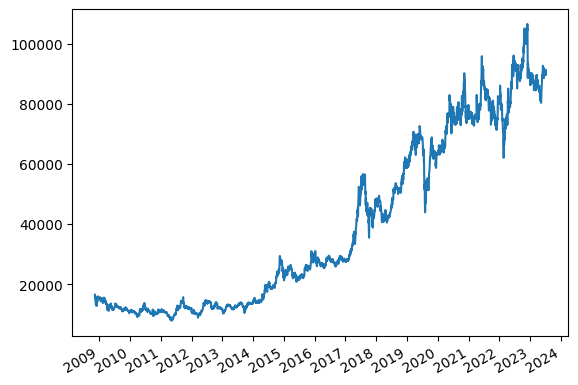

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(df.index, df['Price'])

ax.xaxis.set_major_locator(mdates.DayLocator(interval=365))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.gcf().autofmt_xdate()

plt.show()


In [23]:

df['Price'] = df['Price']/10000
df

,Date,Price,Open,High,Low,Vol.,Change %,Volume
Date,,,,,,,,
2009-07-01,2009-07-01,1.6524,17207,17207,16251,17.96M,0.84%,17960000
2009-07-02,2009-07-02,1.5841,16251,16387,15705,4.36M,-4.13%,4360000
2009-07-03,2009-07-03,1.5295,15431,15568,15295,2.59M,-3.45%,2590000
2009-07-06,2009-07-06,1.5978,15295,15978,15295,4.52M,4.47%,4520000
2009-07-07,2009-07-07,1.5431,15705,15841,15431,3.21M,-3.42%,3210000
...,...,...,...,...,...,...,...,...
2024-02-19,2024-02-19,9.0200,89900,90500,89300,1.05M,0.67%,1050000
2024-02-20,2024-02-20,9.1300,90100,91400,89400,1.40M,1.22%,1400000
2024-02-21,2024-02-21,9.1200,91700,91700,90500,1.37M,-0.11%,1370000


In [24]:
window_df = pd.DataFrame()

window_df = df[['Price','Date']].copy()
window_df['Target-3']=window_df['Price'].shift(3)
window_df['Target-2']= window_df['Price'].shift(2)
window_df['Target-1']= window_df['Price'].shift(1)
window_df['Target'] = window_df['Price']

window_df.drop(columns=['Price'],inplace=True)
window_df.dropna(inplace=True)

In [25]:
window_df

,Date,Target-3,Target-2,Target-1,Target
Date,,,,,
2009-07-06,2009-07-06,1.6524,1.5841,1.5295,1.5978
2009-07-07,2009-07-07,1.5841,1.5295,1.5978,1.5431
2009-07-08,2009-07-08,1.5295,1.5978,1.5431,1.5158
2009-07-09,2009-07-09,1.5978,1.5431,1.5158,1.4749
2009-07-10,2009-07-10,1.5431,1.5158,1.4749,1.4066
...,...,...,...,...,...
2024-02-19,2024-02-19,9.0000,8.9900,8.9600,9.0200
2024-02-20,2024-02-20,8.9900,8.9600,9.0200,9.1300
2024-02-21,2024-02-21,8.9600,9.0200,9.1300,9.1200


In [26]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(window_df)

dates.shape, X.shape, y.shape

((3654,), (3654, 3, 1), (3654,))

In [27]:
dates

array([Timestamp('2009-07-06 00:00:00'), Timestamp('2009-07-07 00:00:00'),
       Timestamp('2009-07-08 00:00:00'), ...,
       Timestamp('2024-02-21 00:00:00'), Timestamp('2024-02-22 00:00:00'),
       Timestamp('2024-02-23 00:00:00')], dtype=object)

In [28]:
X

array([[[1.6524],
        [1.5841],
        [1.5295]],

       [[1.5841],
        [1.5295],
        [1.5978]],

       [[1.5295],
        [1.5978],
        [1.5431]],

       ...,

       [[8.96  ],
        [9.02  ],
        [9.13  ]],

       [[9.02  ],
        [9.13  ],
        [9.12  ]],

       [[9.13  ],
        [9.12  ],
        [8.95  ]]], dtype=float32)

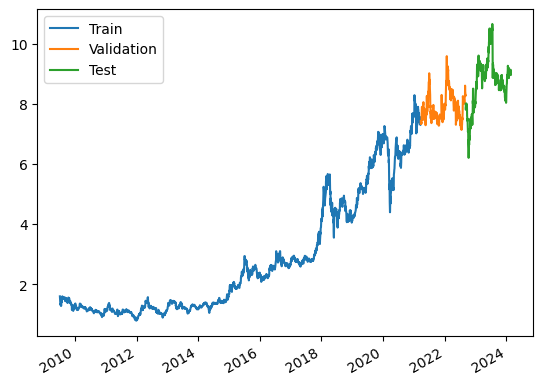

In [29]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=365))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.gcf().autofmt_xdate()
plt.legend(['Train', 'Validation', 'Test'])

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)



Epoch 1/100


92/92 [==============================] - 3s 9ms/step - loss: 1.9866 - mean_absolute_error: 0.8079 - val_loss: 0.9985 - val_mean_absolute_error: 0.9525
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0222 - mean_absolute_error: 0.0989 - val_loss: 0.3096 - val_mean_absolute_error: 0.4933
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0781 - val_loss: 0.3178 - val_mean_absolute_error: 0.5125
Epoch 4/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0663 - val_loss: 0.1829 - val_mean_absolute_error: 0.3684
Epoch 5/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0647 - val_loss: 0.1017 - val_mean_absolute_error: 0.2549
Epoch 6/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0654 - val_loss: 0.0858 - val_mean_absolute_error: 0.2314
Epoch 7/100
92/92 

92/92 [==============================] - 1s 2ms/step


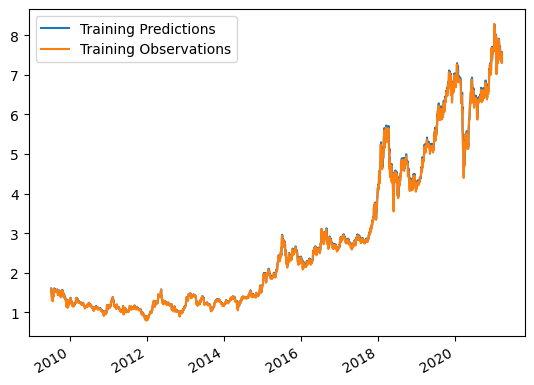

In [31]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.legend(['Training Predictions', 'Training Observations'])

12/12 [==============================] - 0s 2ms/step


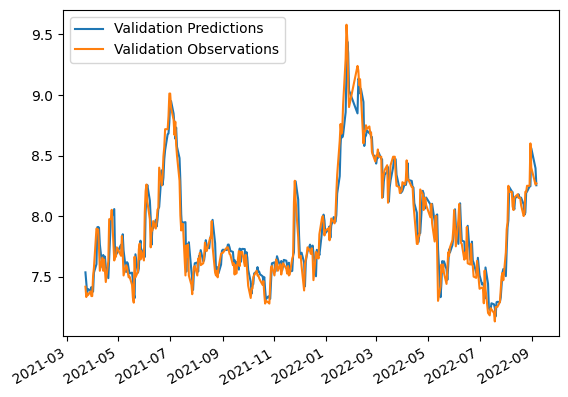

In [32]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.legend(['Validation Predictions', 'Validation Observations'])

12/12 [==============================] - 0s 2ms/step


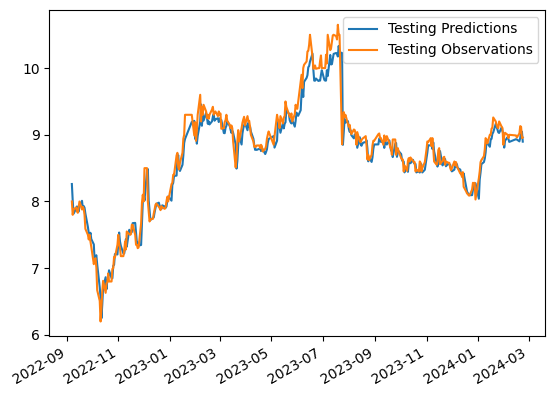

In [33]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.legend(['Testing Predictions', 'Testing Observations'])

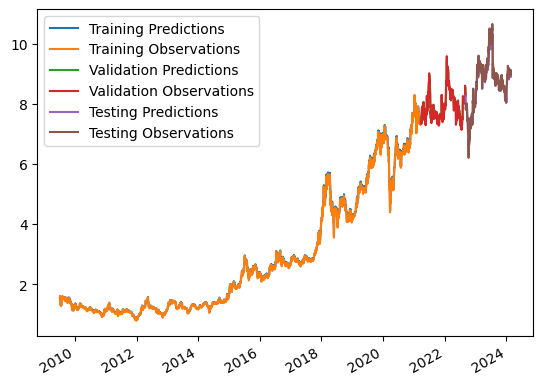

<Figure size 3000x1000 with 0 Axes>

In [34]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])
ax.xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.figure(figsize=(30,10))
plt.show()

In [35]:

import pickle

filepath = r"D:\BTL DataMining\Model\LSTM_model.pkl"
with open(filepath, 'wb') as f:
    pickle.dump(model, f)
